# Semesterarbeit Teil Py3: Anwendung mit Pandas

## Einleitung

Im Rahmen dieser Semesterarbeit beschäftige ich mich mit einer Analyse von Umsatzdaten, die ich von meinem Arbeitgeber, der Jelmoli AG, erhalten habe. Der Datensatz umfasst die Umsatzdaten für das Jahr 2023 sowie die entsprechenden Vorjahreszahlen, was eine vergleichende Analyse ermöglicht. Mein Ziel ist es, durch diese Untersuchung Einsichten in die Leistung der Marken zu gewinnen.

Die Analyse wird in drei Hauptphasen durchgeführt:

1. **Analyse der Top-Performer:** Zunächst identifiziere ich die 10 Marken mit dem höchsten Umsatz im Jahr 2023. Für diese Marken werde ich die Indizes berechnen, um zu sehen, wie sie sich im Vergleich zum Vorjahr entwickelt haben. Dies wird einen ersten Überblick darüber geben, welche Marken am besten abschneiden und wie sich ihr Umsatz zum Vorjahr verändert hat.

2. **Rabattstrategie der Top-Performer:** Im zweiten Schritt konzentriere ich mich auf die Rabattpolitik der Top-Performer. Ich werde die Rabattsätze der Top 10 Marken berechnen und diese mit dem durchschnittlichen Rabattsatz aller Marken vergleichen. Dies soll aufzeigen, wie die Rabattstrategien mit dem Markterfolg korrelieren und ob Top-Performer tendenziell höhere oder niedrigere Rabatte anbieten.

3. **Einfluss des Rabattsatzes auf die Umsatzentwicklung:** Schliesslich untersuche ich die Beziehung zwischen dem Rabattsatz und der Umsatzentwicklung einer Marke. Ziel ist es, zu verstehen, ob und in welchem Masse der Rabattsatz die Umsatzentwicklung beeinflusst. Dazu werde ich die Korrelation zwischen diesen beiden Variablen analysieren und versuchen, Einsichten in die Auswirkungen von Rabatten auf das Umsatzwachstum zu gewinnen.

### Erklärung Datensatz

*Jahr* = Kalenderjahr  
*Abteilung* = Abteilungen bei Jelmoli (wird für diese Arbeit nicht gebraucht)  
*Marke* = Marke  
*Artikel Nr.* = Artikelnummer (wird für diese Arbeit nicht gebraucht)  
*Artikel* Beschreibung = Beschreibung des Artikels (wird für diese Arbeit nicht gebraucht)  
*Farbe* = Farbe des Artikels (wird für diese Arbeit nicht gebraucht)  
*Umsatz Wert VK Original inkl. Mwst* = Umsatz inklusiv Mehrwertsteuer vor Abzug von Rabatt (sozusagen der Bruttoumsatz)  
*Umsatz Wert VK inkl. Mwst (erzielt) MW/BW* = Umsatz inklusiv Mehrwertsteuer nach Abzug von Rabatt  
*Umsatz Wert VK inkl. Mwst MW/BW VJ*= Vorjahres Umsatz Umsatz inklusiv Mehrwertsteuer nach Abzug von Rabatt  


## Teil 1: Analyse der Top-Performer


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Laden des Datensatzes
data = pd.read_excel("/Users/cristianruiz/Desktop/CAS/Python/Semesterarbeit 3 & 4/Umsatz 2023.xlsx")

# Überprüfen der ersten Zeilen, um die Datenstruktur zu verstehen
data.head
display(data)


,Jahr,Abteilung,Marke,Artikel Nr.,Artikel Beschreibung,Farbe,Umsatz Wert VK Original inkl. Mwst,Umsatz Wert VK inkl. Mwst (erzielt) MW/BW,Umsatz Wert VK inkl. Mwst MW/BW VJ,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10025232,Camel Duvet 810g 100% Kamelhaa,WHITE White,349.0,399.0,399.00,NaN,NaN,NaN
1,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10025731,Supersoft Kissen 150 g,. .,NaN,NaN,605.20,NaN,NaN,1. Umsatz der Top 10 Marken über alle Abteilun...
2,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026594,Matratzenauflage 1460g Schurwo,WHITE White,NaN,NaN,179.00,NaN,NaN,NaN
3,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026632,bamboo kissen 220g,WEISS Weiss,NaN,NaN,60.00,NaN,NaN,NaN
4,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026643,Climavision Auflage,. .,NaN,NaN,373.15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
194849,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200394,Haarschmuck - Warengruppenarti,DUMMY Dummyfarbe,0.0,0.0,0.00,NaN,NaN,NaN
194850,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200395,Urban Decay - Warengruppenarti,DUMMY Dummyfarbe,0.0,0.0,NaN,NaN,NaN,NaN
194851,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200399,Guerlain - Warengruppenartikel,DUMMY Dummyfarbe,0.0,185.0,NaN,NaN,NaN,NaN
194852,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200406,Valmont - Warengruppenartikel,DUMMY Dummyfarbe,0.0,0.0,0.05,NaN,NaN,NaN


In [2]:
# Ersetzt NaN durch 0 damit spätere Berechnungen durchgeführt werden können
data = data.fillna(0)

# Überprüfen der ersten Zeilen, um zu bestätigen
display(data)


,Jahr,Abteilung,Marke,Artikel Nr.,Artikel Beschreibung,Farbe,Umsatz Wert VK Original inkl. Mwst,Umsatz Wert VK inkl. Mwst (erzielt) MW/BW,Umsatz Wert VK inkl. Mwst MW/BW VJ,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10025232,Camel Duvet 810g 100% Kamelhaa,WHITE White,349.0,399.0,399.00,0.0,0.0,0
1,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10025731,Supersoft Kissen 150 g,. .,0.0,0.0,605.20,0.0,0.0,1. Umsatz der Top 10 Marken über alle Abteilun...
2,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026594,Matratzenauflage 1460g Schurwo,WHITE White,0.0,0.0,179.00,0.0,0.0,0
3,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026632,bamboo kissen 220g,WEISS Weiss,0.0,0.0,60.00,0.0,0.0,0
4,Kalenderjahr 2023,402 Home/Living,1093 Billerbeck,ARTI10026643,Climavision Auflage,. .,0.0,0.0,373.15,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194849,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200394,Haarschmuck - Warengruppenarti,DUMMY Dummyfarbe,0.0,0.0,0.00,0.0,0.0,0
194850,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200395,Urban Decay - Warengruppenarti,DUMMY Dummyfarbe,0.0,0.0,0.00,0.0,0.0,0
194851,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200399,Guerlain - Warengruppenartikel,DUMMY Dummyfarbe,0.0,185.0,0.00,0.0,0.0,0
194852,Kalenderjahr 2023,906 Parfümerie,NOBRAND,ARTI00200406,Valmont - Warengruppenartikel,DUMMY Dummyfarbe,0.0,0.0,0.05,0.0,0.0,0


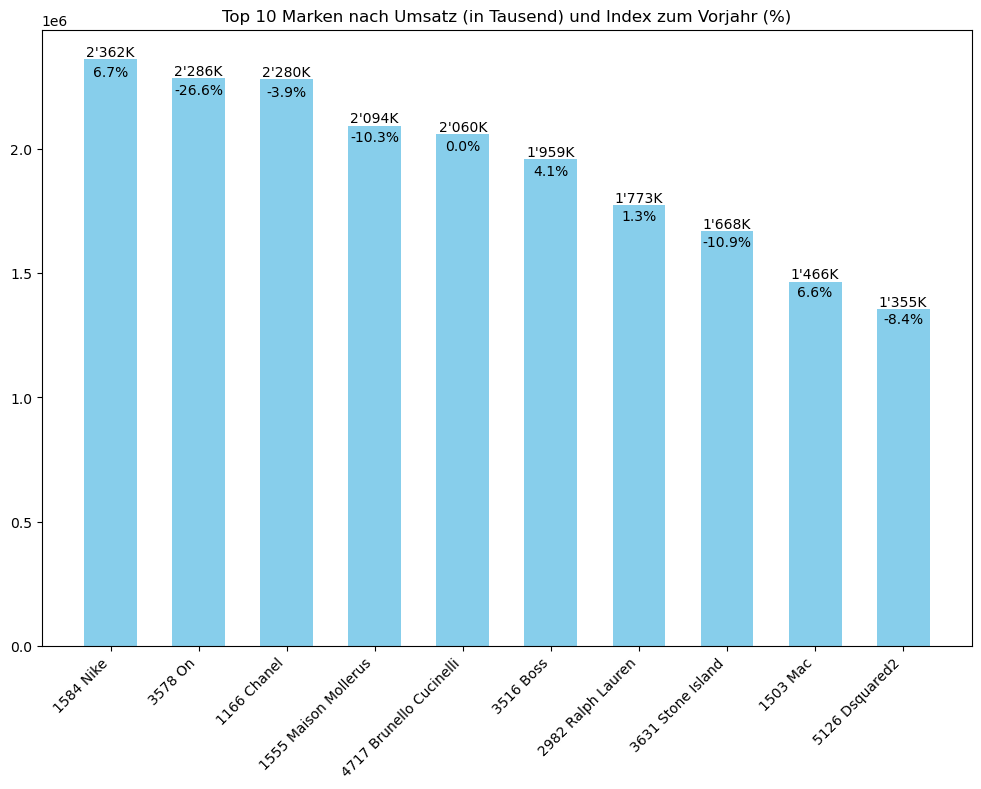

In [3]:
# Berechnung des Gesamtumsatzes pro Marke für das aktuelle Jahr
gesamtumsatz_marke_aktuell = data.groupby('Marke')['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'].sum()

# Berechnung des Gesamtumsatzes pro Marke für das Vorjahr
gesamtumsatz_marke_vorjahr = data.groupby('Marke')['Umsatz Wert VK inkl. Mwst MW/BW VJ'].sum()

# Ermittlung der Top 10 Marken basierend auf dem aktuellen Jahr
top_10_marken = gesamtumsatz_marke_aktuell.sort_values(ascending=False).head(10)

# Berechnung der Indizes zum Vorjahr für die Top 10 Marken
index_zum_vorjahr = top_10_marken / gesamtumsatz_marke_vorjahr.loc[top_10_marken.index]

# Umwandlung der Indizes in Prozent
index_in_prozent = (index_zum_vorjahr - 1) * 100

# Erstellen des Bar-Diagramms für die Umsätze
plt.figure(figsize=(12, 8))  # Figurgrösse festlegen

# Balkendiagramm für die Umsätze mit angepasster Balkenbreite
bar_width = 0.6
bars = plt.bar(top_10_marken.index, top_10_marken.values, color='skyblue', width=bar_width)

# Hinzufügen der Umsatzwerte und Indizes unter den Balken
for bar, umsatz, index in zip(bars, top_10_marken.values, index_in_prozent.values):
    # Formatieren der Umsatzwerte in 'Tausend' und ohne Dezimalstellen
    umsatz_formatiert = f"{int(umsatz / 1000):,}".replace(",", "'") + "K"
    # Setzen des Umsatztextes direkt über dem Balken
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), umsatz_formatiert, ha='center', va='bottom')
    # Setzen des Indextextes etwas tiefer unter dem Umsatztext
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * .99, f"{index:.1f}%", ha='center', va='top')

# Anpassen der x-Achse
plt.xticks(range(len(top_10_marken)), top_10_marken.index, rotation=45, ha='right')  # Setzen der Tick-Beschriftungen

# Titel hinzufügen
plt.title('Top 10 Marken nach Umsatz (in Tausend) und Index zum Vorjahr (%)')

# Anzeigen des Diagramms
plt.show()

Hier sehen wir also die 10 Marken mit dem höchsten Umsatz im Jahr 2023. Mit einem Plus von 6.7% hat Nike die Beste Entwicklung zu Vorjahr gemacht. Besonders negativ fallen die Marken On (-26.6%), Maison Mollerus (-10.3%) und Stone Island (-10.9%) auf.

## Teil 2: Rabattstrategie der Top-Performer

In diesem Schritt werden zuerst die Umsatz- und Originalpreisdaten auf Markenebene hinzugefügt, um Rabattsätze zu berechnen. Durch den Vergleich dieser Raten mit dem Gesamtdurchschnitt wird eine Abweichungen und Trend identifiziert. Anschliessend werden die Rabattsätze der Top-Marken gegenüber dem Durchschnitt visualisiert, um Muster zu erkennen.

Durchschnittlicher Rabattsatz über alle Marken: 15.2%
Durchschnittlicher Rabattsatz der Top-Marken:
Marke
1166 Chanel                 3.5%
1503 Mac                   -6.2%
1555 Maison Mollerus       10.8%
1584 Nike                  22.3%
2982 Ralph Lauren          15.2%
3516 Boss                  15.2%
3578 On                     3.3%
3631 Stone Island          13.4%
4717 Brunello Cucinelli    20.8%
5126 Dsquared2             36.6%
Name: Rabattsatz, dtype: object


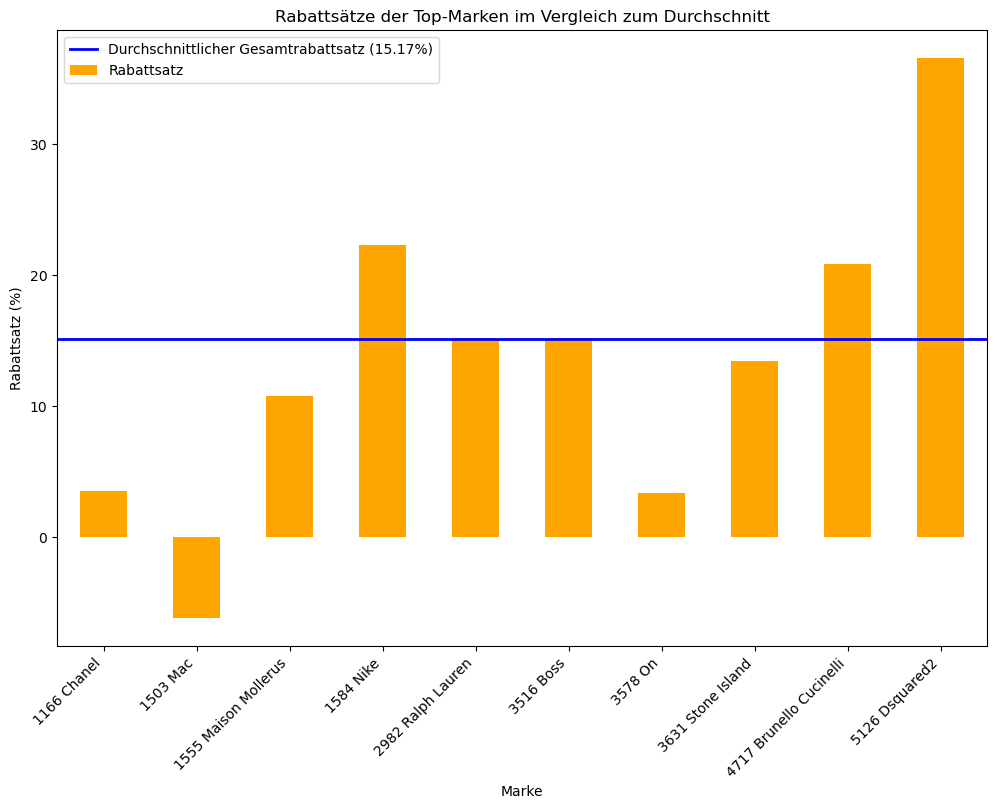

In [4]:
# Berechnung der Gesamtsummen für Umsatz und Originalpreis pro Marke
marken_umsatz = data.groupby('Marke').agg({
    'Umsatz Wert VK inkl. Mwst (erzielt) MW/BW': 'sum',
    'Umsatz Wert VK Original inkl. Mwst': 'sum'
}).reset_index()

# Vermeidung von Division durch Null
marken_umsatz['Umsatz Wert VK Original inkl. Mwst'].replace(0, 1, inplace=True)

# Berechnung des Rabattsatzes basierend auf aggregierten Werten
marken_umsatz['Rabattsatz'] = (1 - (marken_umsatz['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'] / marken_umsatz['Umsatz Wert VK Original inkl. Mwst'])) * 100

# Berechnung des durchschnittlichen Rabattsatzes über alle Marken basierend auf den Gesamtsummen
gesamt_erzielter_umsatz = data['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'].sum()
gesamt_original_umsatz = data['Umsatz Wert VK Original inkl. Mwst'].sum()
durchschnittlicher_gesamtrabattsatz = (1 - gesamt_erzielter_umsatz / gesamt_original_umsatz) * 100

# Ermitteln des durchschnittlichen Rabattsatzes für die Top 10 Marken
rabattsatz_top_marken = marken_umsatz[marken_umsatz['Marke'].isin(top_10_marken.index)].set_index('Marke')['Rabattsatz']

# Ausgabe des durchschnittlichen Rabattsatzes der Top-Marken und des gesamten Durchschnitts
print(f"Durchschnittlicher Rabattsatz über alle Marken: {durchschnittlicher_gesamtrabattsatz:.1f}%")
print("Durchschnittlicher Rabattsatz der Top-Marken:")
print(rabattsatz_top_marken.apply(lambda x: f"{x:.1f}%"))

# Visualisierung der Rabattsätze im Vergleich zum Durchschnitt
fig, ax = plt.subplots(figsize=(12, 8))

# Balkendiagramm für die Rabattsätze der Top-Marken
rabattsatz_top_marken.plot(kind='bar', color='orange', ax=ax)

# Linie für den durchschnittlichen Rabattsatz
ax.axhline(durchschnittlicher_gesamtrabattsatz, color='blue', linewidth=2, label=f'Durchschnittlicher Gesamtrabattsatz ({durchschnittlicher_gesamtrabattsatz:.2f}%)')

# Titel und Legende hinzufügen
plt.title('Rabattsätze der Top-Marken im Vergleich zum Durchschnitt')
plt.ylabel('Rabattsatz (%)')
plt.legend()

# Anpassen der x-Achse
ax.set_xticks(range(len(rabattsatz_top_marken)))
ax.set_xticklabels(rabattsatz_top_marken.index, rotation=45, ha='right')

# Anzeigen des Diagramms
plt.show()

In der Analyse der Rabattstrategien der Top-Marken im Vergleich zum durchschnittlichen Rabattsatz aller Marken haben wird festgestellt, dass der durchschnittliche Rabattsatz aller Marken bei 15.2% liegt. Die Rabattsätze der Top 10 Marken variieren deutlich, mit Werten von -6.2% bis 36.6%. Einige Top-Performer wie Chanel und On bieten deutlich niedrigere Rabatte, während andere wie Nike und Dsquared2 überdurchschnittlich hohe Rabatte aufweisen. Diese Ergebnisse deuten auf unterschiedliche Preisstrategien hin, die nicht unbedingt mit der Markenleistung korrelieren und eine differenzierte Betrachtung erfordern. Dies wird im näcshten Teilschritt versucht.

## Teil 3: Einfluss des Rabattsatzes auf die Umsatzentwicklung

In dieser Analyse konzentrieren wir uns auf die Top 100 Marken, die aufgrund ihres hohen Umsatzanteils – über 60% des Gesamtumsatzes – von besonderer Bedeutung sind. Diese Fokussierung ermöglicht eine aussagekräftige Untersuchung, da diese Marken eine signifikante Rolle in der Umsatzstruktur spielen. Es werden alle Marken ausgeschlosse, die im aktuellen oder im Vorjahr keinen Umsatz erzielt haben (für die Vergleichbarkeit), und filtern den Datensatz, um ausschliesslich die Daten der Top 100 Marken zu betrachten. Für jede Marke der Gesamtumsatz berechnet, der Originalpreis und die Umsatzentwicklung, um ihren Rabattsatz zu ermitteln. Nachdem die durchschnittliche Umsatzentwicklung und den Rabattsatz für jede Marke bestimmt wurde, wird führen eine Korrelationsanalyse durchgeführt, um mögliche Zusammenhänge zwischen diesen beiden Variablen aufzudecken. Schliesslich werden die Ergebnisse in einem Scatterplot mit Regressionslinie visualisiert, um die Beziehung zwischen Rabattsatz und Umsatzentwicklung für diese einflussreichen Marken zu veranschaulichen.

Korrelationsmatrix zwischen Umsatzentwicklung und Rabattsatz für die Top 100 Marken:
                   Umsatzentwicklung  Rabattsatz
Umsatzentwicklung           1.000000   -0.611009
Rabattsatz                 -0.611009    1.000000


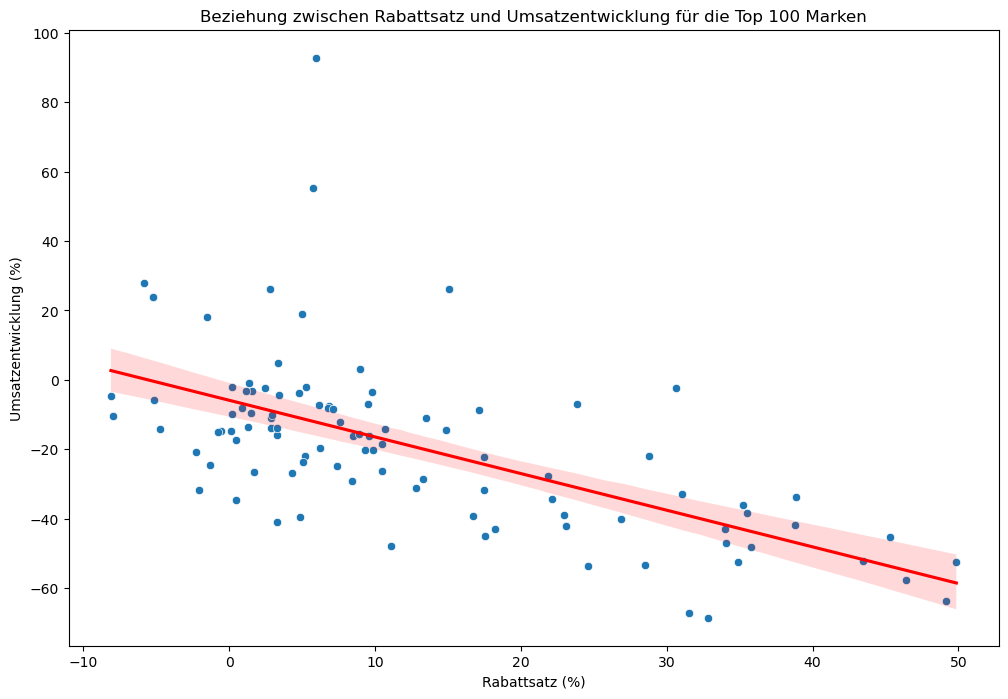

In [5]:
import seaborn as sns

# Filtern von Marken, die sowohl im aktuellen Jahr als auch im Vorjahr Umsatz erzielt haben
data = data[(data['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'] > 0) & (data['Umsatz Wert VK inkl. Mwst MW/BW VJ'] > 0)]

# Ermittlung der Top 100 Marken basierend auf dem aktuellen Jahr
top_100_marken = data.groupby('Marke')['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'].sum().sort_values(ascending=False).head(100).index

# Filtern der Daten, um nur die Top 100 Marken zu berücksichtigen
data_top_100 = data[data['Marke'].isin(top_100_marken)]

# Berechnung des Gesamtumsatzes pro Marke für das aktuelle Jahr und Vorjahr
marken_umsatz = data_top_100.groupby('Marke').agg({
    'Umsatz Wert VK inkl. Mwst (erzielt) MW/BW': 'sum',
    'Umsatz Wert VK Original inkl. Mwst': 'sum',
    'Umsatz Wert VK inkl. Mwst MW/BW VJ': 'sum'
}).reset_index()

# Vermeidung von Division durch Null
marken_umsatz['Umsatz Wert VK Original inkl. Mwst'].replace(0, 1, inplace=True)

# Berechnung des Rabattsatzes basierend auf aggregierten Werten
marken_umsatz['Rabattsatz'] = (1 - (marken_umsatz['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'] / marken_umsatz['Umsatz Wert VK Original inkl. Mwst'])) * 100

# Berechnung der Umsatzentwicklung für jede Marke
marken_umsatz['Umsatzentwicklung'] = (marken_umsatz['Umsatz Wert VK inkl. Mwst (erzielt) MW/BW'] - marken_umsatz['Umsatz Wert VK inkl. Mwst MW/BW VJ']) / marken_umsatz['Umsatz Wert VK inkl. Mwst MW/BW VJ'] * 100

# Durchschnittliche Umsatzentwicklung und Rabattsatz pro Marke berechnen
marken_entwicklung = marken_umsatz.set_index('Marke')[['Umsatzentwicklung', 'Rabattsatz']]

# Korrelationsanalyse durchführen
korrelation = marken_entwicklung.corr()

# Ergebnisse interpretieren
print("Korrelationsmatrix zwischen Umsatzentwicklung und Rabattsatz für die Top 100 Marken:")
print(korrelation)

# Visualisierung der Beziehung zwischen Umsatzentwicklung und Rabattsatz
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rabattsatz', y='Umsatzentwicklung', data=marken_entwicklung)

# Regressionslinie hinzufügen, um die Beziehung zu verdeutlichen
sns.regplot(x='Rabattsatz', y='Umsatzentwicklung', data=marken_entwicklung, scatter=False, color='red')

# Achsenbeschriftungen und Titel
plt.xlabel('Rabattsatz (%)')
plt.ylabel('Umsatzentwicklung (%)')
plt.title('Beziehung zwischen Rabattsatz und Umsatzentwicklung für die Top 100 Marken')

# Anzeigen des Plots
plt.show()

### Interpretation der Werte:

- **0.234423 für Umsatzentwicklung und Rabattsatz:**
    - Diese Zahl zeigt eine positive, aber relativ schwache Korrelation an. Das bedeutet, dass es eine Tendenz gibt, dass mit steigendem Rabattsatz auch die Umsatzentwicklung steigt, aber die Beziehung ist nicht sehr stark.
    - Dieser Wert deutet darauf hin, dass andere Faktoren neben dem Rabattsatz wahrscheinlich ebenfalls eine wesentliche Rolle bei der Beeinflussung der Umsatzentwicklung spielen.

### Wichtig zu beachten:

- **Korrelation impliziert keine Kausalität:** Selbst wenn zwei Variablen stark korreliert sind, bedeutet das nicht, dass die eine die andere verursacht. Es könnte andere, nicht berücksichtigte Variablen geben, die sowohl die Umsatzentwicklung als auch den Rabattsatz beeinflussen.

Zusammenfassend zeigen diese Werte, dass zwischen der Rabatthöhe und der Umsatzentwicklung der Top 100 Marken eine gewisse positive Beziehung besteht, die Beziehung aber nicht sehr stark ist. Weitere Analysen und Überlegungen wären notwendig, um fundierte Schlüsse über die Art dieses Zusammenhangs zu ziehen.
